# AUTOMOBILE CLASSIFICATION USING HIERARCHICAL CLUSTERING

In [1]:
#importing libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy
%matplotlib inline

### loading data

In [7]:
df=pd.read_csv("cars_clus.csv")
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


### removing null values

In [8]:
print("Shape before removing null values: ",df.shape)
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']]=df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric,errors="coerce")
df=df.dropna()
df=df.reset_index(drop=True)

print("Shape after removing the null values: ",df.shape)

Shape before removing null values:  (159, 16)
Shape after removing the null values:  (117, 16)


### Feature Selction

In [10]:
feature_set=df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
feature_set.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


### Normalization

In [11]:
x=feature_set.values            #return numpy array
min_max_scaler=MinMaxScaler()   #storing in a variable

feature_mtx=min_max_scaler.fit_transform(x)  #fitter the scaler to our data and transforming the array to that range

feature_mtx

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333],
       [0.45714286, 0.64556962, 0.44251627, 0.68263473, 0.64980027,
        0.62329193, 0.61751152, 0.2       ],
       [0.25714286, 0.34936709, 0.31887202, 0.35329341, 0.35419441,
        0.40434783, 0.29032258, 0.3       ],
       [0.25714286, 0.34936709, 0.40780911, 0.49700599, 0.51398136,
        0.48975155, 0.37788018, 0.32666667],
       [0.3       , 0.30379747, 0.35574837, 0.60479042, 0.60186418,
        0.45745342, 0.331797

### USING SCI-KIT LEARN

In [12]:
#Step 1: Finding distance matrics

In [13]:
dist_mtx=euclidean_distances(feature_mtx,feature_mtx)    #finding distance
dist_mtx

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [14]:
#Step 2: Finding linkage

In [15]:
z_dist_linkage=hierarchy.linkage(dist_mtx,"complete") #making a linkagee

<ipython-input-15-8df08e36fd6f>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z_dist_linkage=hierarchy.linkage(dist_mtx,"complete") #making a linkagee


In [16]:
#Step 3: Forming a dendrogram

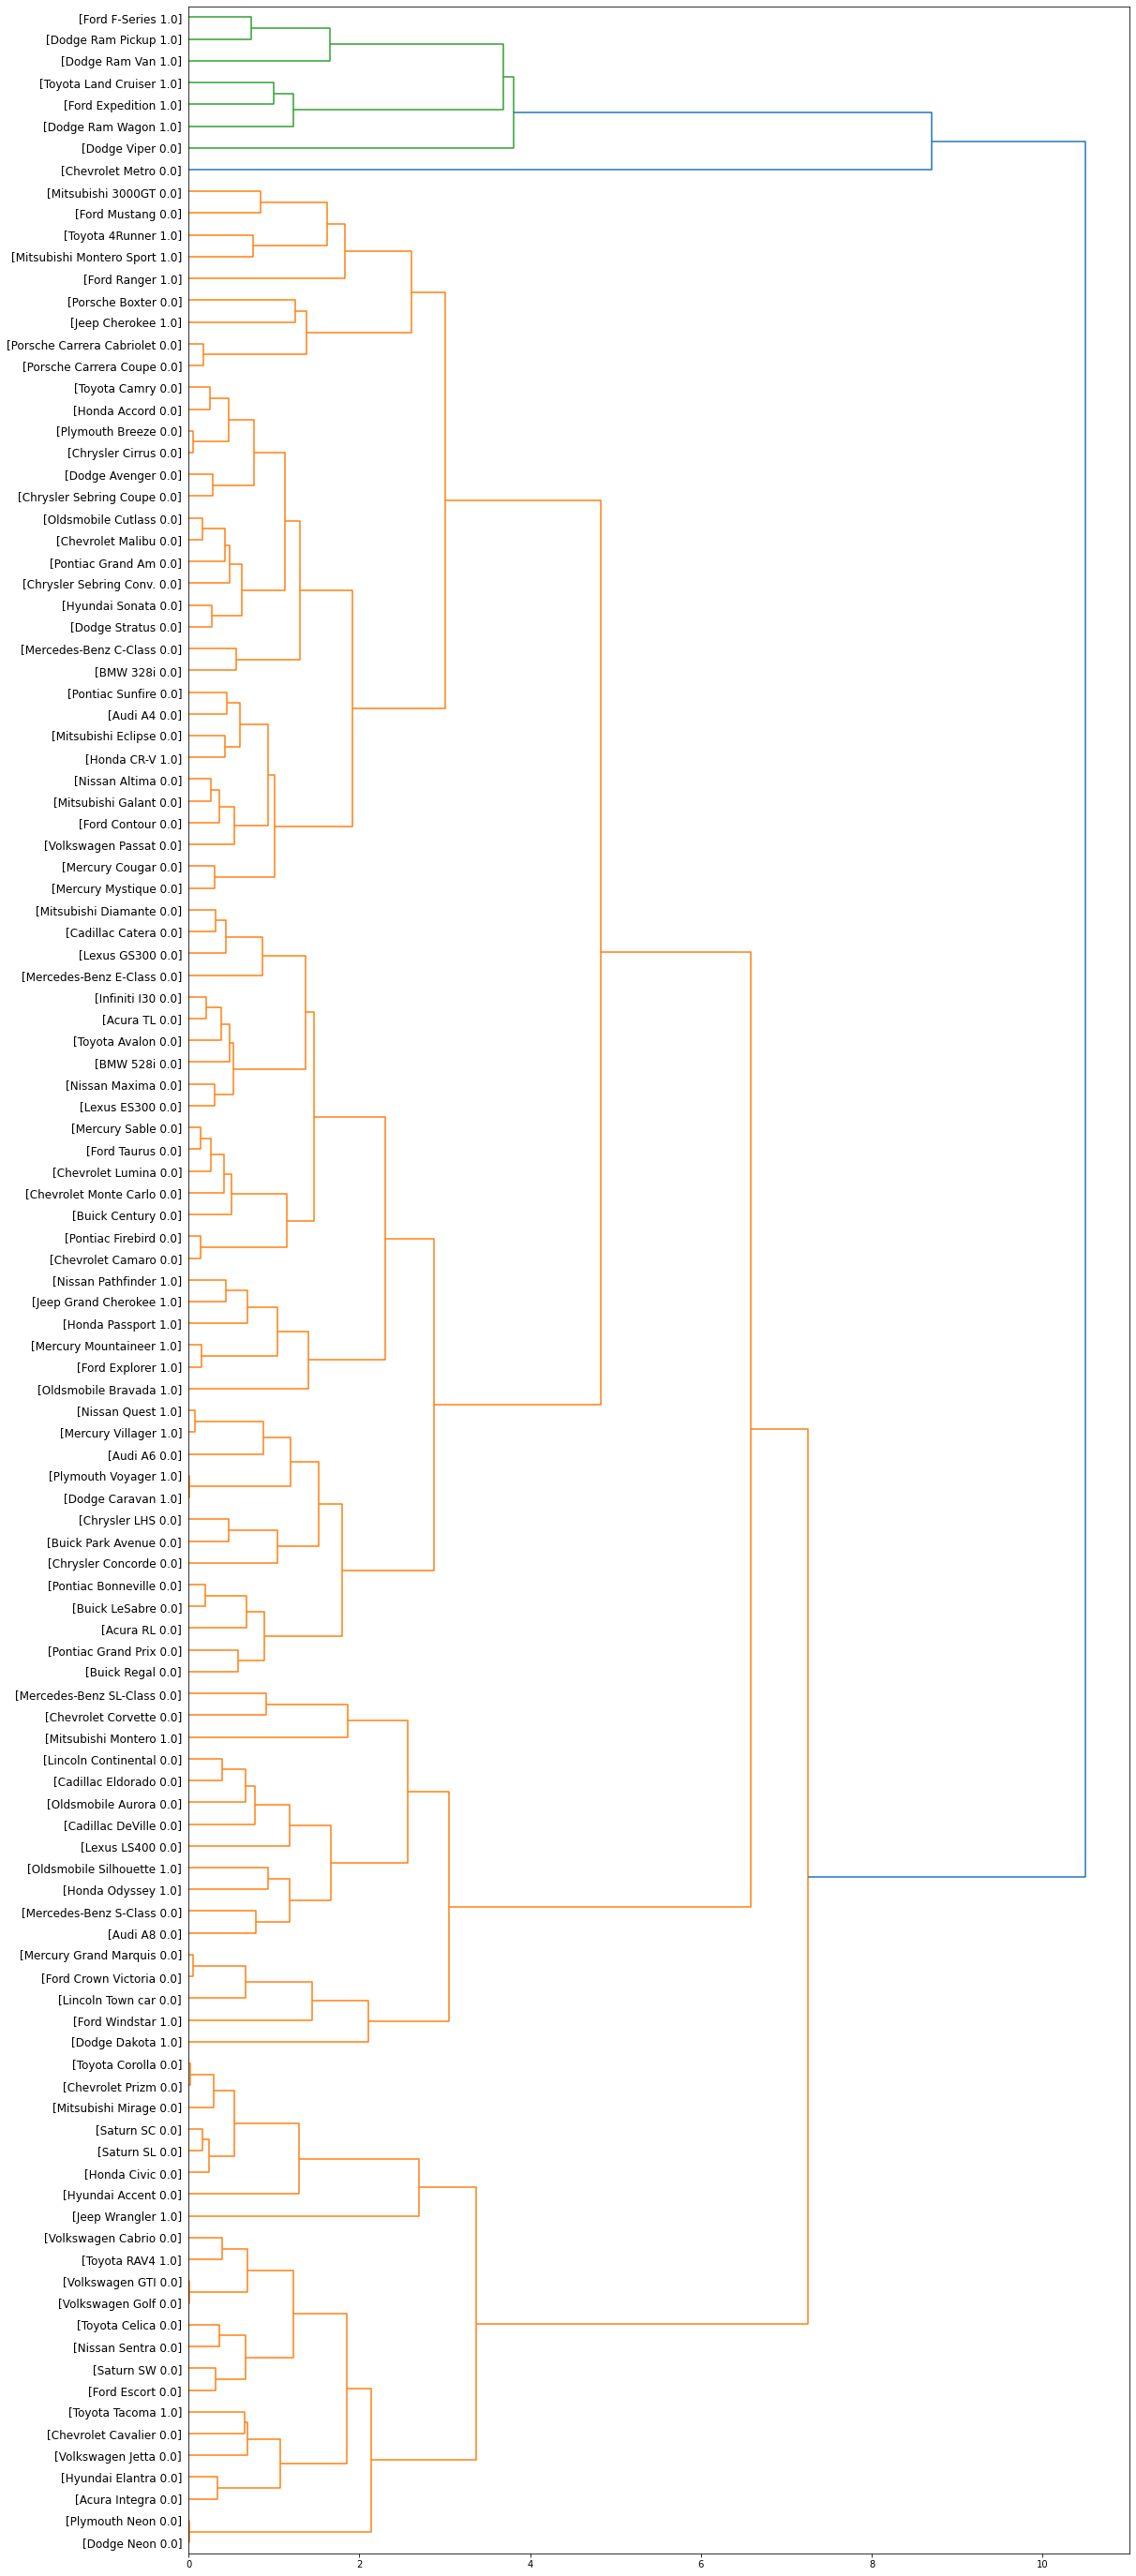

In [19]:
fig=pl.figure(figsize=(18,50))

def iif(id):
    return"[%s %s %s]"%(df["manufact"][id],df["model"][id],df["type"][id])

dendro=hierarchy.dendrogram(z_dist_linkage,leaf_label_func=iif,orientation="right",leaf_rotation=0,leaf_font_size=12)

In [20]:
#Step 4: using agglomerative clustering function of sklearn

In [21]:
agglom=AgglomerativeClustering(n_clusters=6,linkage="complete")    #storing clustering in a variable
agglom.fit(dist_mtx)                                               #fitting to the distance matrics


agglom.labels_                                                     #Getting agglomerative clustering labels

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 2, 2, 4, 1,
       5, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 4, 2, 1, 3, 3, 2, 4, 2, 4,
       0, 3, 0, 1, 3, 3, 2, 4, 1, 1, 3, 2, 1, 3, 2, 2, 2, 4, 4, 4, 1, 3,
       3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 4,
       2, 4, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 3, 1, 1], dtype=int64)

In [23]:
df["clusters"]=agglom.labels_                           #Storing labels in a dataframe

df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,clusters
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


# Visualization

In [24]:
#Step1: Getting colors

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

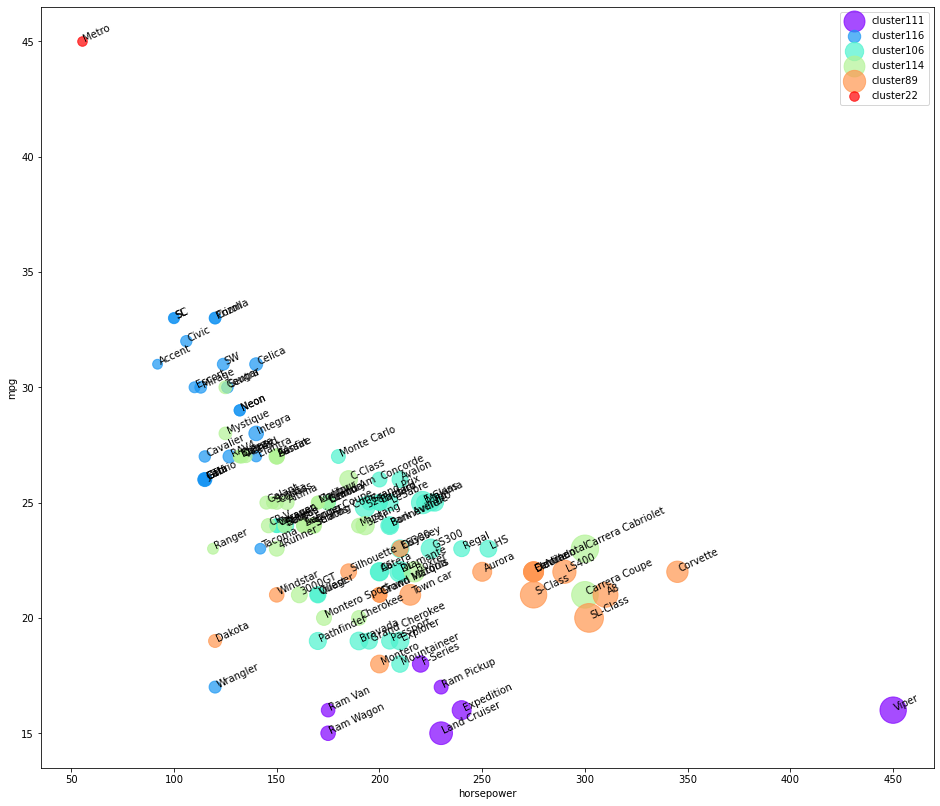

In [33]:
import matplotlib.cm as cm

n_clusters=max(agglom.labels_)+1   #number of clusters formed

colors=cm.rainbow(np.linspace(0,1,n_clusters))   #colorbar and color labels
cluster_labels=list(range(0,n_clusters))         #storing the cluster labels in a list

fig=plt.figure(figsize=(16,14))                #Making the artboard

for color,label in zip(colors,cluster_labels):
    subset=df[df.clusters==label]
    for i in subset.index:
        plt.text(subset.horsepow[i],subset.mpg[i],str(subset["model"][i]),rotation=25)
    plt.scatter(subset.horsepow,subset.mpg,s=subset.price*10,c=color,alpha=0.7,label="cluster"+str(i))
    
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.legend()
plt.show()



In [34]:
#Hierarchical indecing by grouping and count

In [37]:
df.groupby(["clusters","type"])["clusters"].count()     #counting on the basis og grouped hierarchy

clusters  type
0         0.0      1
          1.0      6
1         0.0     20
          1.0      3
2         0.0     26
          1.0     10
3         0.0     28
          1.0      5
4         0.0     12
          1.0      5
5         0.0      1
Name: clusters, dtype: int64

In [38]:
#hierarchical indexing with the feature

In [40]:
agglom_car=df.groupby(["clusters","type"])['horsepow','engine_s','mpg','price'].mean()   #hieraricical grouping and taking mean
agglom_car

<ipython-input-40-00defe9530f0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agglom_car=df.groupby(["clusters","type"])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
clusters type                                            
0        0.0   450.000000  8.000000  16.000000  69.725000
         1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   118.500000  1.890000  29.550000  14.226100
         1.0   129.666667  2.300000  22.333333  14.292000
2        0.0   203.615385  3.284615  24.223077  27.988692
         1.0   182.000000  3.420000  20.300000  26.120600
3        0.0   168.107143  2.557143  25.107143  24.693786
         1.0   155.600000  2.840000  22.000000  19.807000
4        0.0   267.666667  4.566667  21.416667  46.417417
         1.0   173.000000  3.180000  20.600000  24.308400
5        0.0    55.000000  1.000000  45.000000   9.235000

In [41]:
#plotting

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

      horsepow  engine_s   mpg  price
type                                 
0.0       55.0       1.0  45.0  9.235


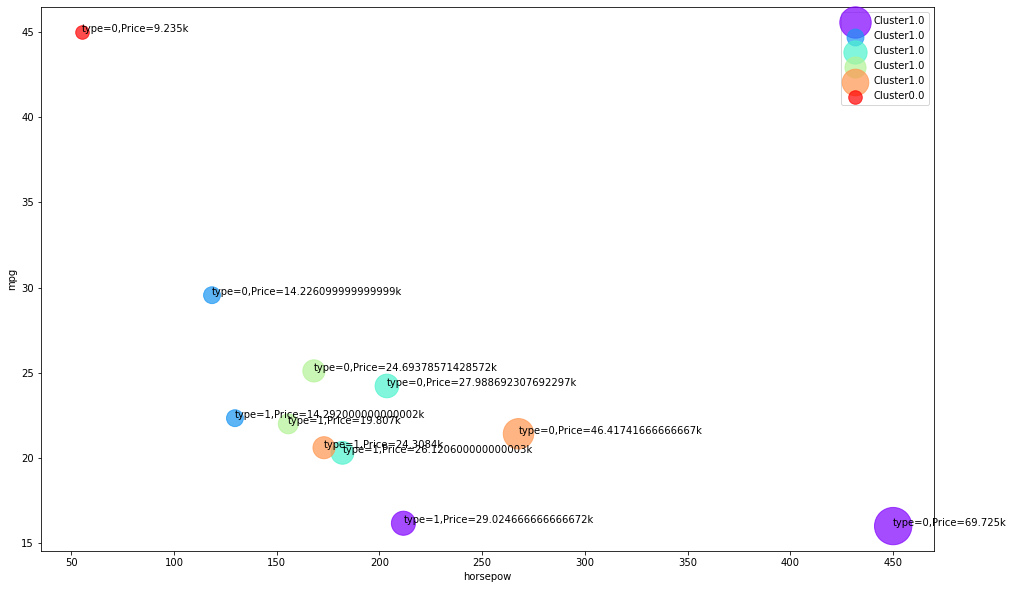

In [44]:
fig=plt.figure(figsize=(16,10))

print(agglom_car.loc[(label,),])

for color,label in zip(colors,cluster_labels):
    subset=agglom_car.loc[(label,),]
    for i in subset.index:
        plt.text(subset.horsepow[i],subset.mpg[i],"type="+str(int(i))+",Price="+str(subset.loc[i][3])+"k")
    plt.scatter(subset.horsepow,subset.mpg,s=subset.price*20,c=color,alpha=0.7,label="Cluster"+str(i))
    
plt.xlabel("horsepow")
plt.ylabel("mpg")
plt.legend()